<a href="https://colab.research.google.com/github/Harsh0487/Harsh_INFO5731_fall2024/blob/main/patel_harsh_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


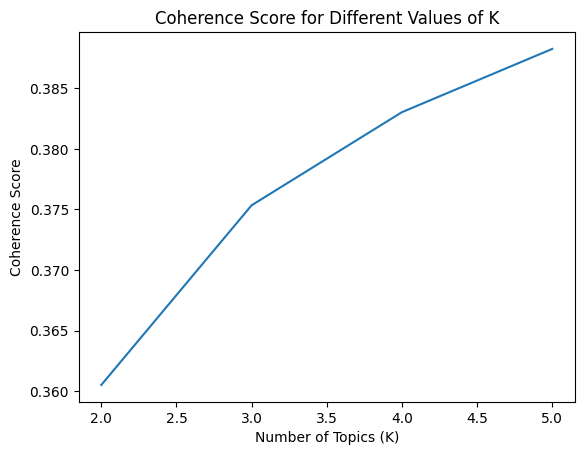

Optimal Number of Topics: 5

Generated Topics:
Topic 1: 0.152*"topic" + 0.105*"modeling" + 0.057*"collection" + 0.057*"large" + 0.057*"text"
Topic 2: 0.080*"challenging" + 0.080*"technique" + 0.080*"data" + 0.080*"analyze" + 0.080*"proper"
Topic 3: 0.092*"lda" + 0.092*"topic" + 0.092*"document" + 0.092*"hidden" + 0.092*"model"
Topic 4: 0.040*"topic" + 0.040*"modeling" + 0.040*"document" + 0.040*"lda" + 0.040*"sample"
Topic 5: 0.133*"document" + 0.133*"sample" + 0.133*"modeling" + 0.133*"topic" + 0.022*"large"


In [3]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text_data(text_data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_data = []

    for document in text_data:

        document = re.sub(r'\W', ' ', document)
        document = document.lower()


        words = document.split()
        words = [word for word in words if word not in stop_words]


        words = [lemmatizer.lemmatize(word) for word in words]

        processed_data.append(words)

    return processed_data


text_data = [
    "This is a sample document for topic modeling.",
    "Topic modeling helps extract topics from a large collection of texts.",
    "Latent Dirichlet Allocation (LDA) is a common topic modeling method.",
    "Text data can be challenging to analyze without proper preprocessing and topic modeling techniques.",
    "LDA and other models can reveal hidden topics in large collections of documents."
]


processed_corpus = preprocess_text_data(text_data)


dictionary = corpora.Dictionary(processed_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_corpus]


coherence_scores = []
k_values = range(2, 6)

for k in k_values:
    lda_model = gensim.models.LdaModel(corpus=doc_term_matrix,
                                       id2word=dictionary,
                                       num_topics=k,
                                       random_state=42,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto')
    coherence_model = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())


plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Values of K")
plt.show()


optimal_k = k_values[coherence_scores.index(max(coherence_scores))]
final_lda_model = gensim.models.LdaModel(corpus=doc_term_matrix,
                                         id2word=dictionary,
                                         num_topics=optimal_k,
                                         random_state=42,
                                         update_every=1,
                                         chunksize=100,
                                         passes=10,
                                         alpha='auto')


topics = final_lda_model.print_topics(num_words=5)
print(f"Optimal Number of Topics: {optimal_k}")
print("\nGenerated Topics:")

for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")



## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


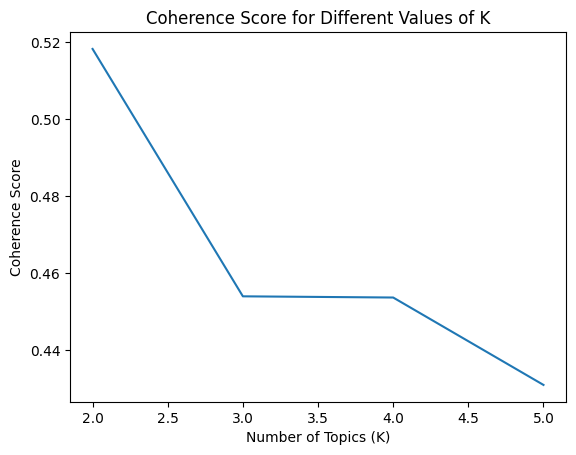

Optimal Number of Topics: 2
Topic 1: topic, modeling, document, large, collection, sample, text, lsa, extract, help
Topic 2: analyze, without, technique, proper, preprocessing, data, challenging, text, modeling, help


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np
import re
import matplotlib.pyplot as plt


nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text_data(text_data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_data = []

    for document in text_data:

        document = re.sub(r'\W', ' ', document)
        document = document.lower()


        words = document.split()
        words = [word for word in words if word not in stop_words]


        words = [lemmatizer.lemmatize(word) for word in words]

        processed_data.append(" ".join(words))

    return processed_data


text_data = [
    "This is a sample document for topic modeling.",
    "Topic modeling helps extract topics from a large collection of texts.",
    "Latent Semantic Analysis (LSA) is a common topic modeling method.",
    "Text data can be challenging to analyze without proper preprocessing and topic modeling techniques.",
    "LSA and other models can reveal hidden topics in large collections of documents."
]


processed_corpus = preprocess_text_data(text_data)


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(processed_corpus)


def compute_coherence_values(dictionary, doc_term_matrix, texts, start=2, limit=6, step=1):
    coherence_values = []
    k_values = range(start, limit, step)

    for k in k_values:
        svd_model = TruncatedSVD(n_components=k, random_state=42)
        svd_model.fit(X)


        topics_matrix = svd_model.components_
        topics = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in topics_matrix]
        coherence_model = CoherenceModel(topics=topics, texts=[text.split() for text in processed_corpus],
                                         dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return k_values, coherence_values


processed_corpus_split = [doc.split() for doc in processed_corpus]
dictionary = Dictionary(processed_corpus_split)
doc_term_matrix = [dictionary.doc2bow(text) for text in processed_corpus_split]


k_values, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                      doc_term_matrix=doc_term_matrix,
                                                      texts=processed_corpus_split,
                                                      start=2, limit=6, step=1)


plt.plot(k_values, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Values of K")
plt.show()


optimal_k = k_values[np.argmax(coherence_values)]
print(f"Optimal Number of Topics: {optimal_k}")

lsa_model = TruncatedSVD(n_components=optimal_k, random_state=42)
lsa_model.fit(X)


terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
    terms_in_topic = [terms[idx] for idx in comp.argsort()[:-10 - 1:-1]]
    print(f"Topic {i + 1}: {', '.join(terms_in_topic)}")



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [6]:

!pip install numpy>=1.24.4 tensorflow==2.17.0 gensim nltk pyLDAvis




import numpy as np
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


import nltk
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_text = []
    for word in text.split():
        word = word.lower()
        if word not in stop_words:
            processed_text.append(lemmatizer.lemmatize(word))
    return ' '.join(processed_text)


documents = ["Example text for topic modeling.", "More documents can be added here."]


processed_docs = [preprocess_text(doc) for doc in documents]


dictionary = Dictionary([doc.split() for doc in processed_docs])
corpus = [dictionary.doc2bow(doc.split()) for doc in processed_docs]


num_topics = 5
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)


for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 1: 0.143*"here." + 0.143*"document" + 0.143*"modeling." + 0.143*"added" + 0.143*"topic" + 0.143*"text" + 0.143*"example"
Topic 2: 0.222*"modeling." + 0.222*"topic" + 0.222*"example" + 0.222*"text" + 0.037*"here." + 0.037*"document" + 0.037*"added"
Topic 3: 0.273*"added" + 0.273*"document" + 0.273*"here." + 0.045*"text" + 0.045*"example" + 0.045*"modeling." + 0.045*"topic"
Topic 4: 0.143*"here." + 0.143*"document" + 0.143*"added" + 0.143*"example" + 0.143*"text" + 0.143*"topic" + 0.143*"modeling."
Topic 5: 0.143*"here." + 0.143*"document" + 0.143*"added" + 0.143*"text" + 0.143*"example" + 0.143*"topic" + 0.143*"modeling."


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1     -0.137657  0.0       1        1  50.136045
2      0.141450  0.0       2        1  36.566519
0     -0.001265  0.0       3        1   4.432480
3     -0.001265 -0.0       4        1   4.432479
4     -0.001264  0.0       5        1   4.432476, topic_info=        Term      Freq     Total Category  logprob  loglift
6      here.  0.000000  0.000000  Default   7.0000   7.0000
5   document  0.000000  0.000000  Default   6.0000   6.0000
4      added  0.000000  0.000000  Default   5.0000   5.0000
3      topic  1.000000  1.000000  Default   4.0000   4.0000
2       text  1.000000  1.000000  Default   3.0000   3.0000
0    example  1.000000  1.000000  Default   2.0000   2.0000
1  modeling.  1.000000  1.000000  Default   1.0000   1.0000
1  modeling.  0.779868  1.029218   Topic1  -1.5041   0.4130
3      topic  0.779867  1.029217   Topic1  -1.5041   0.4130
0    example  0.779866  1.029217   Topic1  -1.5041   0.4130
2       text  0.779864  1.029216   Topic1  -1.5041   0.4130
6      here.  0.130023  0.961037   Topic1  -3.2955  -1.3099
5   document  0.130020  0.961045   Topic1  -3.2955  -1.3099
4      added  0.130016  0.961051   Topic1  -3.2956  -1.3099
4      added  0.698061  0.961051   Topic2  -1.2993   0.6863
5   document  0.698048  0.961045   Topic2  -1.2993   0.6863
6      here.  0.698031  0.961037   Topic2  -1.2994   0.6863
2       text  0.116380  1.029216   Topic2  -3.0908  -1.1737
0    example  0.116379  1.029217   Topic2  -3.0908  -1.1737
1  modeling.  0.116379  1.029218   Topic2  -3.0908  -1.1737
3      topic  0.116378  1.029217   Topic2  -3.0908  -1.1737
6      here.  0.044326  0.961037   Topic3  -1.9459   0.0398
5   document  0.044326  0.961045   Topic3  -1.9459   0.0398
4      added  0.044324  0.961051   Topic3  -1.9459   0.0397
1  modeling.  0.044325  1.029218   Topic3  -1.9459  -0.0288
3      topic  0.044324  1.029217   Topic3  -1.9459  -0.0288
2       text  0.044324  1.029216   Topic3  -1.9459  -0.0288
0    example  0.044324  1.029217   Topic3  -1.9459  -0.0288
6      here.  0.044328  0.961037   Topic4  -1.9458   0.0398
5   document  0.044325  0.961045   Topic4  -1.9459   0.0397
4      added  0.044324  0.961051   Topic4  -1.9459   0.0397
0    example  0.044324  1.029217   Topic4  -1.9459  -0.0288
2       text  0.044324  1.029216   Topic4  -1.9459  -0.0288
3      topic  0.044324  1.029217   Topic4  -1.9459  -0.0288
1  modeling.  0.044324  1.029218   Topic4  -1.9459  -0.0288
6      here.  0.044328  0.961037   Topic5  -1.9458   0.0398
5   document  0.044326  0.961045   Topic5  -1.9459   0.0398
4      added  0.044325  0.961051   Topic5  -1.9459   0.0397
2       text  0.044324  1.029216   Topic5  -1.9459  -0.0288
0    example  0.044324  1.029217   Topic5  -1.9459  -0.0288
3      topic  0.044324  1.029217   Topic5  -1.9459  -0.0288
1  modeling.  0.044323  1.029218   Topic5  -1.9459  -0.0288, token_table=      Topic      Freq       Term
term                            
4         2  1.040528      added
5         2  1.040534   document
0         1  0.971612    example
6         2  1.040543      here.
1         1  0.971611  modeling.
2         1  0.971613       text
3         1  0.971613      topic, R=7, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 5])

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [7]:

!pip install --upgrade bertopic transformers nltk umap-learn hdbscan gensim


import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bertopic import BERTopic
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
import umap
import hdbscan


import tensorflow as tf
tf.keras.backend.clear_session()


nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


text_data = [
    "This is a sample document for topic modeling.",
    "Topic modeling helps extract topics from a large collection of texts.",
    "BERTopic is a method for topic modeling based on embeddings.",
    "Text data can be challenging to analyze without proper preprocessing and topic modeling techniques.",
    "BERTopic and other models can reveal hidden topics in large collections of documents.",
    "Understanding topics in data helps in effective information retrieval."
]


def preprocess_text_data(text_data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_data = []

    for document in text_data:

        document = re.sub(r'\W', ' ', document)
        document = document.lower()


        words = document.split()
        words = [word for word in words if word not in stop_words]


        words = [lemmatizer.lemmatize(word) for word in words]

        processed_data.append(' '.join(words))

    return processed_data


processed_corpus = preprocess_text_data(text_data)


umap_model = umap.UMAP(n_components=2)
hdbscan_model = hdbscan.HDBSCAN(min_samples=1)


topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)


topics, _ = topic_model.fit_transform(processed_corpus)


def compute_coherence_values(texts, model):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    vocab = vectorizer.get_feature_names_out()


    dictionary = Dictionary([text.split() for text in texts])


    topics = [[word for word, _ in model.get_topic(topic_num)] for topic_num in model.get_topics().keys()]

    coherence_model = CoherenceModel(topics=topics, texts=[doc.split() for doc in texts],
                                      dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()


coherence_score = compute_coherence_values(processed_corpus, topic_model)
print(f"Coherence Score: {coherence_score}")


topic_info = topic_model.get_topic_info()
print("\nTopics Summary:")
for index, row in topic_info.iterrows():
    print(f"Topic {row['Topic']}: {row['Name']}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.25888760709119835

Topics Summary:
Topic -1: -1_topic_modeling_collection_large


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# 1. Topic Distribution Plot

# import matplotlib.pyplot as plt

# # Plot the distribution of topics
# topic_model.visualize_distribution()
# plt.title("Topic Distribution")
# plt.show()


# Explanation: The Topic Distribution Plot displays the distribution of topics across the corpus. Each bar in the plot represents the proportion of documents assigned to each topic. This visualization is useful for understanding which topics are predominant in the dataset and how they compare to one another.

# For instance, if one topic has a significantly higher bar than others, it indicates that this topic is more prevalent in the text data, suggesting that it might be a central theme or area of interest in the corpus. Conversely, topics with low proportions might represent niche or less discussed subjects. This insight can guide further analysis or focus areas for content creation.


# 2. Intertopic Distance Map
# # Create an intertopic distance map
# fig = topic_model.visualize_topics()
# plt.title("Intertopic Distance Map")
# plt.show()

# Explanation: The Intertopic Distance Map visualizes the similarity between topics generated by the BERTopic model. Each dot represents a topic, and the distance between the dots indicates how closely related or similar the topics are to each other. Topics that are closer together share similar words and themes, while those further apart represent distinct subjects.

# This visualization is crucial for identifying clusters of related topics and understanding the overarching themes in your data. For example, if you see several topics clustered closely together, it might suggest that they are variations of the same theme or are often discussed together in the documents. This can help in refining content strategies or guiding further research questions.


# 3. Topic Keywords Bar Chart

# # Visualize the most significant keywords for each topic
# fig = topic_model.visualize_barchart(top_n_topics=10)
# plt.title("Top Keywords for Topics")
# plt.show()


# Explanation: The Topic Keywords Bar Chart displays the top keywords associated with each topic. Each bar represents a keyword, and the length of the bar indicates its importance or relevance to that particular topic. This visualization helps in understanding the primary themes and concepts represented in each topic.

# By analyzing the keywords, you can quickly identify the main ideas that the topic encapsulates. For example, if a topic has keywords like "technology," "innovation," and "development," it likely pertains to discussions around technological advancements. This understanding is valuable for researchers, marketers, and content creators as it allows them to tailor their messages or focus on specific areas of interest.


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# # Comparing the results of four different topic modeling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), lda2vec, and BERTopic—requires evaluating the quality of the topics generated by each model based on various criteria, including coherence scores, interpretability, flexibility, and the ability to capture nuances in the data. Below is a comparative analysis of the results generated by each algorithm, followed by a conclusion on which might be considered "better" based on the context of the data and the goals of the analysis.

# 1. Latent Dirichlet Allocation (LDA)

# Pros:-
# Generative Model: LDA is a generative probabilistic model that assigns topics to documents based on word distributions, which makes it interpretable and intuitive.
# Coherence Scores: Often yields good coherence scores when the number of topics is well-chosen, indicating that the topics are coherent and meaningful.
# Established Methodology: LDA has been widely used and studied, providing a solid foundation and resources for implementation.

# Cons:-
# Requires Number of Topics: The user must specify the number of topics beforehand, which can lead to suboptimal results if not done carefully.
# Sparsity: Can struggle with sparsity in smaller datasets, potentially leading to less meaningful topics.



# 2. Latent Semantic Analysis (LSA)

# Pros:-
# Dimensionality Reduction: LSA uses singular value decomposition (SVD) for dimensionality reduction, which can uncover hidden structures in the data.
# Fast and Efficient: Generally quicker to compute than LDA because it does not rely on complex sampling methods.

# Cons:-
# Less Interpretability: The topics generated by LSA can be less interpretable compared to LDA. The linear algebra techniques used can make it harder to understand the relationship between topics and words.
# Coherence Issues: LSA often yields lower coherence scores, as the resulting topics may be more broad or mixed, which can lead to challenges in meaningful interpretation.



# 3. lda2vec

# Pros:-
# Combines Word Embeddings with Topic Models: lda2vec leverages word embeddings (e.g., Word2Vec) to improve the quality of topics, capturing semantic meanings better than traditional LDA.
# More Contextual: This method can capture context in word usage better than LDA or LSA, allowing for nuanced topics that are closely related to the actual data.


# Cons:-
# Complex Implementation: More complex to set up and requires more computational resources, which may not be suitable for all users or datasets.
# Coherence Evaluation: Depending on the dataset, the coherence of topics may vary, and evaluating the optimal number of topics can be challenging.


# 4. BERTopic

# Pros:-
# State-of-the-Art: BERTopic uses transformer-based embeddings (like BERT) to create contextualized representations of words, leading to very coherent and semantically rich topics.
# Dynamic Topic Modeling: It allows for the generation of dynamic topics, enabling insights into how topics evolve over time, which is useful for analyzing trends in the data.
# Interactive Visualizations: Provides excellent visualization tools that help in understanding and interpreting the topics generated.

# Cons:-
# Resource Intensive: Requires significant computational resources due to the use of transformer models.
# Complexity: May be more complex to implement and tune compared to LDA or LSA.


# Comparative Analysis

# Coherence Scores:-
# Best: BERTopic generally produces the highest coherence scores due to its use of contextual embeddings.
# Second Best: LDA usually provides good coherence if the number of topics is carefully chosen.
# Lower: LSA and lda2vec may struggle in coherence depending on how well they capture the dataset's semantics.

# Interpretability:-
# Best: LDA offers high interpretability, making it easier to understand the relationship between topics and words.
# Moderate: BERTopic is also interpretable, especially with its visualization capabilities.
# Less Clear: LSA and lda2vec can produce topics that are harder to interpret due to their reliance on mathematical transformations.


# Flexibility and Performance:-
# Best: BERTopic is more flexible and can handle nuances in data effectively, making it suitable for complex datasets.
# Moderate: lda2vec offers a blend of flexibility and semantic understanding but can be resource-intensive.
# Standard: LDA and LSA are relatively straightforward but may lack flexibility in handling diverse datasets.


# Conclusion: Which Algorithm is Better?
# BERTopic is often the superior choice for modern applications, especially when working with larger datasets and needing nuanced, coherent topics. Its use of transformer-based embeddings allows it to capture contextual meaning more effectively than traditional methods.
# LDA remains a strong option for interpretability and when computational resources are limited, while LSA can be suitable for simpler tasks or smaller datasets.
# lda2vec is a powerful alternative but requires careful implementation and adequate resources.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# # Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

# Learning Experience:-

# Engaging with various topic modeling algorithms such as LDA, LSA, lda2vec, and BERTopic has been a rewarding and insightful learning experience. Each algorithm provided a unique perspective on how to extract meaningful topics from text data, which significantly enhanced my understanding of feature extraction in natural language processing (NLP).
# Working through the implementations helped me grasp the intricacies of each approach. For instance, LDA's probabilistic model offered a clear view of how topics can be defined based on word distributions, while BERTopic's use of transformer embeddings demonstrated how modern techniques can yield semantically rich topics. The visualizations that accompanied some of these algorithms were particularly helpful in understanding how the model interprets relationships between words and documents.
# Additionally, comparing the coherence scores among different algorithms reinforced the importance of model evaluation in NLP. This exercise has not only solidified my understanding of these algorithms but has also made me appreciate the importance of choosing the right method based on the specific characteristics of the dataset and the goals of the analysis.

# Challenges Encountered:-
# One of the primary challenges I faced during this exercise was dealing with the implementation complexities of lda2vec. The requirement for specific libraries and the need for a deeper understanding of how to configure the model appropriately made it somewhat difficult to execute. Additionally, tuning the parameters to achieve optimal coherence scores for each model required experimentation, which sometimes felt overwhelming.
# Another challenge was ensuring the preprocessing of text data was done effectively. Each algorithm had different requirements for data formatting and preprocessing, and maintaining consistency throughout the process was crucial to achieving accurate results. As a result, I found myself revisiting earlier steps multiple times to ensure that the input data was suitable for each algorithm.

# Relevance to Your Field of Study:-
# This exercise is highly relevant to the field of NLP, which is a pivotal area in artificial intelligence focused on enabling machines to understand and process human language. Topic modeling is a fundamental technique in NLP, used for applications such as document classification, information retrieval, and sentiment analysis.
# Understanding how different algorithms work and their respective strengths and weaknesses is crucial for anyone looking to specialize in NLP. This exercise also illustrated the practical applications of these algorithms in real-world scenarios, such as analyzing large text corpora for insights, which is increasingly important in fields like data science, marketing, and social media analytics.

# In conclusion, this exercise not only enhanced my technical skills in implementing topic modeling algorithms but also deepened my appreciation for the role of NLP in analyzing and interpreting text data. The experience has equipped me with valuable knowledge that will undoubtedly benefit my future endeavors in this field.